In [1]:
import os
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

# Make sure the data folder exists
os.makedirs("data", exist_ok=True)

# Random seed for reproducibility
np.random.seed(42)

# ---- ORDERS ----
n_orders = 1000
order_ids = range(1, n_orders + 1)
products = np.random.choice(["Engine Block", "Gearbox", "Axle", "Brake Disc", "Turbine Blade"], n_orders)
quantities = np.random.randint(1, 50, n_orders)
order_dates = [datetime(2024, 1, 1) + timedelta(days=int(x)) for x in np.random.randint(0, 365, n_orders)]
delivery_times = np.random.randint(1, 15, n_orders)  # days
priorities = np.random.choice(["Low", "Medium", "High"], n_orders, p=[0.4, 0.4, 0.2])

orders = pd.DataFrame({
    "OrderID": order_ids,
    "Product": products,
    "Quantity": quantities,
    "OrderDate": order_dates,
    "DeliveryTime_days": delivery_times,
    "Priority": priorities
})
orders.to_csv("data/orders.csv", index=False)

# ---- MACHINES ----
machines = pd.DataFrame({
    "MachineID": range(1, 21),
    "Type": np.random.choice(["Lathe", "CNC", "Press", "Drill", "Milling"], 20),
    "Status": np.random.choice(["Running", "Idle", "Maintenance"], 20, p=[0.6, 0.2, 0.2]),
    "Utilization_%": np.random.randint(50, 100, 20),
    "LastMaintenance": [datetime(2024, 1, 1) + timedelta(days=int(x)) for x in np.random.randint(0, 365, 20)]
})
machines.to_csv("data/machines.csv", index=False)

# ---- INVENTORY ----
inventory = pd.DataFrame({
    "MaterialID": range(1, 51),
    "Material": np.random.choice(["Steel", "Aluminium", "Titanium", "Copper"], 50),
    "Stock_kg": np.random.randint(100, 5000, 50),
    "ReorderLevel": np.random.randint(200, 1000, 50)
})
inventory.to_csv("data/inventory.csv", index=False)

# ---- QUALITY ----
n_quality = 500
quality = pd.DataFrame({
    "CheckID": range(1, n_quality + 1),
    "Product": np.random.choice(products, n_quality),
    "Defects": np.random.randint(0, 5, n_quality),
    "Inspector": np.random.choice(["A", "B", "C", "D"], n_quality),
    "Date": [datetime(2024, 1, 1) + timedelta(days=int(x)) for x in np.random.randint(0, 365, n_quality)]
})
quality.to_csv("data/quality.csv", index=False)

print("✅ Mock data generated and saved in /data folder!")


✅ Mock data generated and saved in /data folder!


In [2]:
import pandas as pd

orders = pd.read_csv("data/orders.csv")
orders.head()


,OrderID,Product,Quantity,OrderDate,DeliveryTime_days,Priority
0,1,Brake Disc,12,2024-03-16,3,Low
1,2,Turbine Blade,44,2024-11-23,8,High
2,3,Axle,36,2024-12-10,8,High
3,4,Turbine Blade,48,2024-10-28,12,Medium
4,5,Turbine Blade,4,2024-10-15,7,High


In [3]:
import pandas as pd

# Load datasets
orders = pd.read_csv("data/orders.csv")
machines = pd.read_csv("data/machines.csv")
inventory = pd.read_csv("data/inventory.csv")
quality = pd.read_csv("data/quality.csv")

# Quick previews
print("Orders dataset:")
display(orders.head())

print("Machines dataset:")
display(machines.head())

print("Inventory dataset:")
display(inventory.head())

print("Quality dataset:")
display(quality.head())


Orders dataset:


,OrderID,Product,Quantity,OrderDate,DeliveryTime_days,Priority
0,1,Brake Disc,12,2024-03-16,3,Low
1,2,Turbine Blade,44,2024-11-23,8,High
2,3,Axle,36,2024-12-10,8,High
3,4,Turbine Blade,48,2024-10-28,12,Medium
4,5,Turbine Blade,4,2024-10-15,7,High


Machines dataset:


,MachineID,Type,Status,Utilization_%,LastMaintenance
0,1,Lathe,Running,64,2024-12-25
1,2,CNC,Idle,95,2024-05-30
2,3,Press,Maintenance,74,2024-07-10
3,4,CNC,Running,70,2024-02-09
4,5,CNC,Idle,73,2024-08-29


Inventory dataset:


,MaterialID,Material,Stock_kg,ReorderLevel
0,1,Steel,3362,536
1,2,Steel,1549,618
2,3,Steel,4600,811
3,4,Titanium,1332,874
4,5,Copper,4217,321


Quality dataset:


,CheckID,Product,Defects,Inspector,Date
0,1,Axle,2,B,2024-01-31
1,2,Brake Disc,3,A,2024-06-06
2,3,Gearbox,2,D,2024-04-21
3,4,Turbine Blade,2,B,2024-09-03
4,5,Axle,0,D,2024-05-01


In [4]:
print("Orders shape:", orders.shape)
print("Machines shape:", machines.shape)
print("Inventory shape:", inventory.shape)
print("Quality shape:", quality.shape)


Orders shape: (1000, 6)
Machines shape: (20, 5)
Inventory shape: (50, 4)
Quality shape: (500, 5)


In [5]:
print(orders.isna().sum())
print(machines.isna().sum())
print(inventory.isna().sum())
print(quality.isna().sum())


OrderID              0
Product              0
Quantity             0
OrderDate            0
DeliveryTime_days    0
Priority             0
dtype: int64
MachineID          0
Type               0
Status             0
Utilization_%      0
LastMaintenance    0
dtype: int64
MaterialID      0
Material        0
Stock_kg        0
ReorderLevel    0
dtype: int64
CheckID      0
Product      0
Defects      0
Inspector    0
Date         0
dtype: int64


In [6]:
print(orders.describe())
print(machines.describe())
print(inventory.describe())
print(quality.describe())


           OrderID     Quantity  DeliveryTime_days
count  1000.000000  1000.000000        1000.000000
mean    500.500000    25.501000           7.447000
std     288.819436    14.005076           4.066661
min       1.000000     1.000000           1.000000
25%     250.750000    13.000000           4.000000
50%     500.500000    26.000000           7.000000
75%     750.250000    37.000000          11.000000
max    1000.000000    49.000000          14.000000
       MachineID  Utilization_%
count   20.00000      20.000000
mean    10.50000      76.550000
std      5.91608      14.680725
min      1.00000      53.000000
25%      5.75000      69.250000
50%     10.50000      73.500000
75%     15.25000      92.250000
max     20.00000      98.000000
       MaterialID     Stock_kg  ReorderLevel
count    50.00000    50.000000     50.000000
mean     25.50000  2690.100000    589.500000
std      14.57738  1527.380567    241.505503
min       1.00000   171.000000    243.000000
25%      13.25000  1339.5000

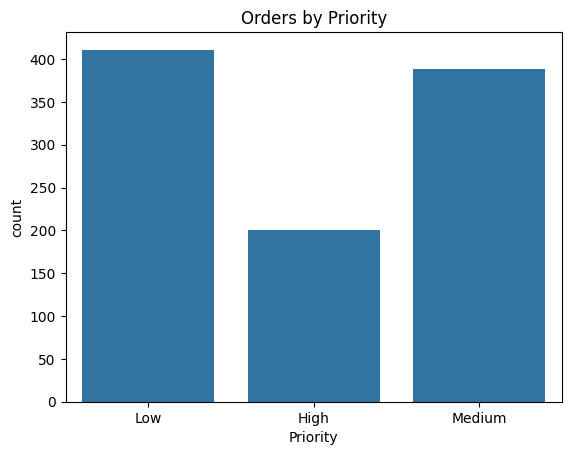

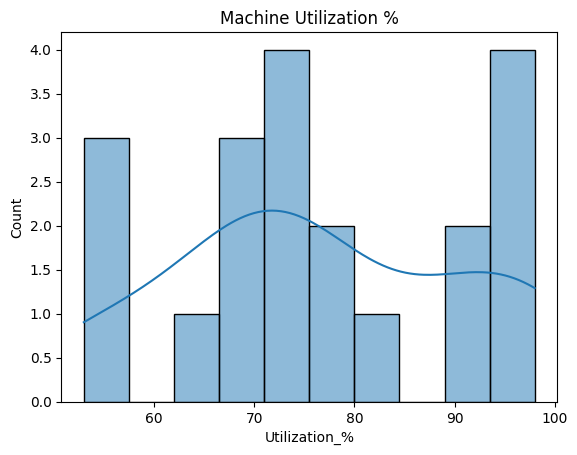

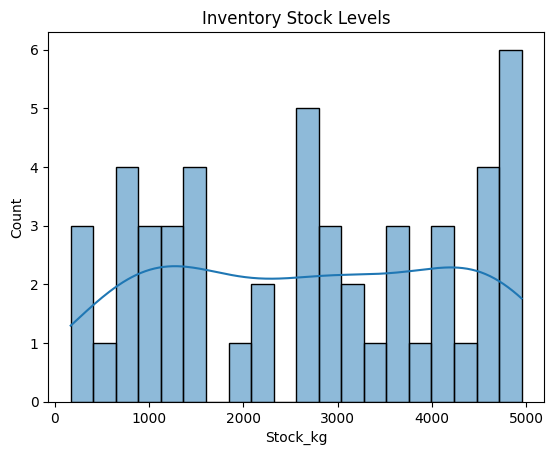

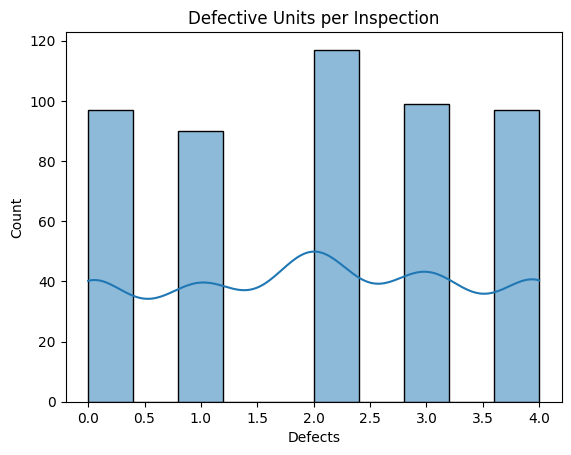

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Orders by priority
sns.countplot(x='Priority', data=orders)
plt.title("Orders by Priority")
plt.show()

# Machine utilization histogram
sns.histplot(machines['Utilization_%'], bins=10, kde=True)
plt.title("Machine Utilization %")
plt.show()

# Inventory stock distribution
sns.histplot(inventory['Stock_kg'], bins=20, kde=True)
plt.title("Inventory Stock Levels")
plt.show()

# Quality defects distribution
sns.histplot(quality['Defects'], bins=10, kde=True)
plt.title("Defective Units per Inspection")
plt.show()


In [ ]:
import numpy as np
import pandas as pd



# Mock operations and machine mapping
operations_list = ["Cutting", "Milling", "Drilling", "Turning", "HeatTreatment", "QC", "Packaging"]
machine_mapping = {
    "Cutting": ["LaserCutter1", "LaserCutter2"],
    "Milling": ["Mill1", "Mill2", "Mill3"],
    "Drilling": ["Drill1", "Drill2"],
    "Turning": ["Lathe1", "Lathe2"],
    "HeatTreatment": ["Furnace1", "Furnace2"],
    "QC": ["QC1", "QC2"],
    "Packaging": ["Pack1", "Pack2"]
}

jobshop_rows = []
for idx, row in orders.iterrows():
    n_ops = np.random.randint(3, 6)  # 3-5 operations per order
    ops = np.random.choice(operations_list, n_ops, replace=False)
    times = np.round(np.random.uniform(1, 8, n_ops), 2)  # hours per operation
    machines_assigned = [np.random.choice(machine_mapping[op]) for op in ops]
    
    for op, t, m in zip(ops, times, machines_assigned):
        jobshop_rows.append({
            "OrderID": row["OrderID"],
            "Product": row["Product"],
            "Priority": row["Priority"],
            "Operation": op,
            "Machine": m,
            "ProcessTime_hr": t,
            "DueDate": row["OrderDate"] + pd.to_timedelta(row["DeliveryTime_days"], unit='d')
        })

jobshop_df = pd.DataFrame(jobshop_rows)



# Days until due
jobshop_df['DaysUntilDue'] = (jobshop_df['DueDate'] - pd.Timestamp.today()).dt.days

# Encode priority numerically
priority_map = {"Low": 1, "Medium": 2, "High": 3}
jobshop_df['PriorityNum'] = jobshop_df['Priority'].map(priority_map)

# Flag long operations (>6 hrs)
jobshop_df['LongOpFlag'] = jobshop_df['ProcessTime_hr'] > 6



# Machine load per operation
machine_load = jobshop_df.groupby('Machine')['ProcessTime_hr'].sum().sort_values(ascending=False)
print("Machine load (total hours per machine):\n", machine_load)

# Number of long operations per machine
long_ops = jobshop_df.groupby('Machine')['LongOpFlag'].sum().sort_values(ascending=False)
print("\nNumber of long operations per machine:\n", long_ops)

# Orders nearing due date (<5 days)
urgent_orders = jobshop_df[jobshop_df['DaysUntilDue'] < 5]
print("\nUrgent orders (<5 days to due):\n", urgent_orders[['OrderID','Product','DaysUntilDue','Priority']].head(10))


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Total load per machine
machine_load = jobshop_df.groupby('Machine')['ProcessTime_hr'].sum().sort_values(ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(x=machine_load.index, y=machine_load.values, palette="viridis")
plt.xticks(rotation=45)
plt.ylabel("Total Processing Hours")
plt.title("Total Load per Machine")
plt.show()

long_ops = jobshop_df[jobshop_df['LongOpFlag']]
plt.figure(figsize=(12,6))
sns.countplot(x='Machine', data=long_ops, palette="magma")
plt.xticks(rotation=45)
plt.ylabel("Number of Long Operations (>6 hrs)")
plt.title("Long Operations per Machine")
plt.show()

urgent_orders = jobshop_df[jobshop_df['DaysUntilDue'] < 5]

plt.figure(figsize=(12,6))
sns.countplot(x='Priority', data=urgent_orders, palette="coolwarm")
plt.title("Urgent Orders by Priority")
plt.show()

# Optional: top 10 most urgent orders
print("Top 10 urgent orders:")
display(urgent_orders.sort_values('DaysUntilDue').head(10))

# Pivot table: Machine x Operation, total hours
pivot = jobshop_df.pivot_table(index='Machine', columns='Operation', values='ProcessTime_hr', aggfunc='sum', fill_value=0)

plt.figure(figsize=(12,8))
sns.heatmap(pivot, annot=True, fmt=".1f", cmap="YlGnBu")
plt.title("Machine-Operation Load Heatmap (hours)")
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from pulp import LpProblem, LpMinimize, LpVariable, lpSum, LpStatus



# Take a smaller subset for speed/demo
demo_df = jobshop_df.sample(50, random_state=42).reset_index(drop=True)

# Each operation gets a start time variable
demo_df['StartTime'] = [LpVariable(f"start_{i}", lowBound=0) for i in range(len(demo_df))]

# Convert DueDate to hours from today
demo_df['DueHour'] = (pd.to_datetime(demo_df['DueDate']) - pd.Timestamp.today()).dt.total_seconds() / 3600

# Encode priority numerically
priority_map = {"Low": 1, "Medium": 2, "High": 3}
demo_df['PriorityNum'] = demo_df['Priority'].map(priority_map)

# Lateness variable
demo_df['Lateness'] = [LpVariable(f"lateness_{i}", lowBound=0) for i in range(len(demo_df))]


prob = LpProblem("SchedulingOptimization", LpMinimize)

# Lateness constraints
for i, row in demo_df.iterrows():
    prob += row['Lateness'] >= row['StartTime'] + row['ProcessTime_hr'] - row['DueHour']


machines_ids = demo_df['Machine'].unique()

for m in machines_ids:
    machine_ops = demo_df[demo_df['Machine'] == m]
    for i in range(len(machine_ops)):
        for j in range(i+1, len(machine_ops)):
            op_i = machine_ops.iloc[i]
            op_j = machine_ops.iloc[j]
            # Prevent overlap (simplified disjunction using a large M, not strict job-shop)
            M = 1e5
            prob += op_i['StartTime'] + op_i['ProcessTime_hr'] <= op_j['StartTime'] + M * 0
            prob += op_j['StartTime'] + op_j['ProcessTime_hr'] <= op_i['StartTime'] + M * 0


prob += lpSum(demo_df['Lateness'] * demo_df['PriorityNum'])


prob.solve()
print("Status:", LpStatus[prob.status])

# Retrieve optimized start times
demo_df['OptimizedStart_hr'] = [v.varValue for v in demo_df['StartTime']]

# Compute finish times manually
demo_df['OptimizedFinish_hr'] = demo_df['OptimizedStart_hr'] + demo_df['ProcessTime_hr']

# Retrieve lateness
demo_df['OptimizedLateness'] = [v.varValue for v in demo_df['Lateness']]

# Display first 10 optimized operations
display(demo_df[['OrderID','Operation','Machine','OptimizedStart_hr','OptimizedFinish_hr','OptimizedLateness']].head(10))


In [ ]:
import matplotlib.pyplot as plt

# Prepare colors by machine
machines = demo_df['Machine'].unique()
colors = plt.cm.tab20.colors  # color palette
color_map = {m: colors[i % len(colors)] for i, m in enumerate(machines)}

# Plot
plt.figure(figsize=(14,8))
for idx, row in demo_df.iterrows():
    plt.barh(
        y=row['Machine'],
        width=row['ProcessTime_hr'],
        left=row['OptimizedStart_hr'],
        color=color_map[row['Machine']],
        edgecolor='black'
    )
    # Optionally add order ID labels
    plt.text(
        row['OptimizedStart_hr'] + row['ProcessTime_hr']/2,
        row['Machine'],
        str(row['OrderID']),
        va='center',
        ha='center',
        color='white',
        fontsize=8
    )

plt.xlabel("Time (hours from now)")
plt.ylabel("Machines")
plt.title("Gantt Chart: Optimized Job-Shop Schedule (Demo Subset)")
plt.grid(True, axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [ ]:
# Total scheduled hours per machine
machine_load = demo_df.groupby('Machine')['ProcessTime_hr'].sum().sort_values(ascending=False)

# Compute average load
avg_load = machine_load.mean()

# Flag machines with load > 1.2 * average as bottleneck
bottlenecks = machine_load[machine_load > 1.2 * avg_load]
print("Potential bottleneck machines:")
display(bottlenecks)

# Orders with due in <5 days
urgent_orders = demo_df[demo_df['DaysUntilDue'] < 5]

# Orders predicted to be late
late_orders = demo_df[demo_df['OptimizedLateness'] > 0]

print("Urgent Orders (due in <5 days):")
display(urgent_orders[['OrderID','Product','DaysUntilDue','Priority','OptimizedLateness']].sort_values('DaysUntilDue'))

print("Predicted Late Orders:")
display(late_orders[['OrderID','Product','DaysUntilDue','Priority','OptimizedLateness']].sort_values('OptimizedLateness', ascending=False))

# Priority score = PriorityNum + normalized lateness
late_orders['PriorityScore'] = late_orders['PriorityNum'] + late_orders['OptimizedLateness'] / late_orders['OptimizedLateness'].max()
late_orders = late_orders.sort_values('PriorityScore', ascending=False)

print("Late orders sorted by priority score:")
display(late_orders[['OrderID','Product','Priority','OptimizedLateness','PriorityScore']].head(10))


In [ ]:
# Machine mapping by operation type (reuse from earlier)
machine_mapping = {
    "Cutting": ["LaserCutter1", "LaserCutter2"],
    "Milling": ["Mill1", "Mill2", "Mill3"],
    "Drilling": ["Drill1", "Drill2"],
    "Turning": ["Lathe1", "Lathe2"],
    "HeatTreatment": ["Furnace1", "Furnace2"],
    "QC": ["QC1", "QC2"],
    "Packaging": ["Pack1", "Pack2"]
}

# Threshold for bottleneck (1.2 * avg load)
avg_load = demo_df.groupby('Machine')['ProcessTime_hr'].sum().mean()
bottleneck_machines = demo_df.groupby('Machine')['ProcessTime_hr'].sum()
bottleneck_machines = bottleneck_machines[bottleneck_machines > 1.2 * avg_load].index.tolist()

reschedule_suggestions = []

for m in bottleneck_machines:
    ops = demo_df[demo_df['Machine'] == m]
    for idx, row in ops.iterrows():
        alternatives = [x for x in machine_mapping[row['Operation']] if x != m]
        reschedule_suggestions.append({
            "OrderID": row['OrderID'],
            "Operation": row['Operation'],
            "CurrentMachine": m,
            "SuggestedAlternatives": alternatives
        })

suggestions_df = pd.DataFrame(reschedule_suggestions)
print("Rescheduling suggestions for bottleneck machines:")
display(suggestions_df.head(10))

# Flag operations on bottleneck machines as potential overtime
demo_df['OvertimeFlag'] = demo_df['Machine'].isin(bottleneck_machines)
print("Operations flagged for potential overtime:")
display(demo_df[demo_df['OvertimeFlag']].head(10))


In [ ]:
# Create a copy for simulation
sim_df = demo_df.copy()

for idx, row in sim_df.iterrows():
    if row['Machine'] in bottleneck_machines:
        alternatives = [x for x in machine_mapping[row['Operation']] if x != row['Machine']]
        if alternatives:
            # Assign to the first available alternative
            sim_df.at[idx, 'Machine'] = alternatives[0]

# Recompute machine loads
sim_machine_load = sim_df.groupby('Machine')['ProcessTime_hr'].sum().sort_values(ascending=False)

print("Machine load after reassignment simulation:")
display(sim_machine_load)

sim_df['OvertimeFlag'] = sim_df['Machine'].isin(bottleneck_machines)
late_orders_after = sim_df[sim_df['OvertimeFlag'] & (sim_df['OptimizedLateness'] > 0)]

print("Late or critical orders still on bottleneck machines after reassignment:")
display(late_orders_after[['OrderID','Operation','Machine','OptimizedLateness']].head(10))

# Add 20% extra capacity (reduce processing time) on bottleneck machines
sim_df['AdjustedProcessTime'] = sim_df['ProcessTime_hr']
sim_df.loc[sim_df['Machine'].isin(bottleneck_machines), 'AdjustedProcessTime'] *= 0.8

# Compute adjusted finish times
sim_df['AdjustedFinish'] = sim_df['OptimizedStart_hr'] + sim_df['AdjustedProcessTime']

# Flag new lateness
sim_df['AdjustedLateness'] = np.maximum(sim_df['AdjustedFinish'] - sim_df['DueHour'], 0)

print("Adjusted lateness after 20% capacity increase on bottleneck machines:")
display(sim_df[['OrderID','Operation','Machine','AdjustedFinish','AdjustedLateness']].head(10))


In [ ]:
# Copy the demo_df for iterative optimization
iter_df = demo_df.copy()

max_iter = 5  # number of iterations
threshold_factor = 1.2  # load > 1.2*avg is considered bottleneck

for iteration in range(max_iter):
    avg_load = iter_df.groupby('Machine')['ProcessTime_hr'].sum().mean()
    machine_loads = iter_df.groupby('Machine')['ProcessTime_hr'].sum()
    bottlenecks = machine_loads[machine_loads > threshold_factor * avg_load].index.tolist()
    
    if not bottlenecks:
        print(f"Iteration {iteration}: No bottlenecks detected. Optimization complete.")
        break
    
    # Attempt reassignment
    for idx, row in iter_df.iterrows():
        if row['Machine'] in bottlenecks:
            alternatives = [x for x in machine_mapping[row['Operation']] if x != row['Machine']]
            if alternatives:
                iter_df.at[idx, 'Machine'] = alternatives[0]
    
    print(f"Iteration {iteration}: Bottleneck machines -> {bottlenecks}")

# Flag remaining overtime candidates
iter_df['OvertimeFlag'] = iter_df['Machine'].isin(bottlenecks)


In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

np.random.seed(42)



num_orders = 100
num_machines = 5
operations_per_order = np.random.randint(2, 5, size=num_orders)  # 2-4 operations per order
machine_list = [f"Machine{i+1}" for i in range(num_machines)]

# Create operation-level rows
order_ids, op_nums = [], []
for order_id, ops in enumerate(operations_per_order, start=1):
    order_ids.extend([order_id]*ops)
    op_nums.extend(range(1, ops+1))

num_ops_total = len(order_ids)

# Random features
order_dates = pd.Timestamp.today() - pd.to_timedelta(np.random.randint(0,5,size=num_ops_total), unit='d')

# Force variation in delivery and process times to produce ~50% lateness
delivery_days = np.random.randint(1,5,size=num_ops_total)           # shorter deadlines
process_time = np.random.uniform(5, 40, size=num_ops_total)         # longer operations
priority = np.random.choice(["Low","Medium","High"], size=num_ops_total, p=[0.3,0.5,0.2])
machine = np.random.choice(machine_list, size=num_ops_total)
delay = np.random.uniform(0, 10, size=num_ops_total)                # machine delays
start_time = np.random.uniform(0, 48, size=num_ops_total) + delay
due_hour = delivery_days * 24
lateness = np.maximum(0, start_time + process_time - due_hour)

# Build DataFrame
jobshop_df = pd.DataFrame({
    "OrderID": order_ids,
    "Operation": [f"Op{i}" for i in op_nums],
    "Machine": machine,
    "ProcessTime_hr": process_time,
    "StartTime_hr": start_time,
    "DueHour": due_hour,
    "OptimizedLateness": lateness,
    "Priority": priority
})

# Encode priority
priority_map = {"Low":1,"Medium":2,"High":3}
jobshop_df['PriorityNum'] = jobshop_df['Priority'].map(priority_map)

# Feature: number of ops per order
jobshop_df['NumOps'] = jobshop_df.groupby('OrderID')['OrderID'].transform('count')

# Feature: machine load (cumulative sum per machine)
jobshop_df['MachineLoad'] = jobshop_df.groupby('Machine')['ProcessTime_hr'].cumsum() - jobshop_df['ProcessTime_hr']

# Feature: days until due
jobshop_df['DaysUntilDue'] = jobshop_df['DueHour'] / 24

# Target variable: 0=on-time, 1=late
jobshop_df['LateFlag'] = (jobshop_df['OptimizedLateness'] > 0).astype(int)

# Check distribution
print("LateFlag distribution:")
print(jobshop_df['LateFlag'].value_counts(normalize=True))



features = ['PriorityNum', 'ProcessTime_hr', 'NumOps', 'MachineLoad', 'DaysUntilDue']
X = jobshop_df[features]
y = jobshop_df['LateFlag']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

importances = pd.Series(clf.feature_importances_, index=features).sort_values(ascending=False)
print("\nFeature Importances:")
display(importances)


LateFlag distribution:
LateFlag
0    0.580537
1    0.419463
Name: proportion, dtype: float64

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.92      0.91        38
           1       0.86      0.82      0.84        22

    accuracy                           0.88        60
   macro avg       0.88      0.87      0.87        60
weighted avg       0.88      0.88      0.88        60


Feature Importances:


DaysUntilDue      0.593886
MachineLoad       0.174991
ProcessTime_hr    0.163583
PriorityNum       0.036324
NumOps            0.031215
dtype: float64


--- Jobshop DataFrame Head ---


,OrderID,Product,Quantity,OrderDate,DeliveryTime_days,PriorityNum,Machine,ProcessTime_hr,NumOps,MachineLoad,DaysUntilDue,OptimizedLateness,LateFlag
0,0,ProdC,1,2025-08-22,1,3,M4,5,2,70.365786,0,4,1
1,1,ProdA,4,2025-08-20,1,3,M3,4,3,47.417383,2,1,1
2,2,ProdC,2,2025-08-21,1,1,M3,2,1,9.783416,0,0,0
3,3,ProdC,8,2025-08-21,4,1,M5,7,4,49.161588,5,1,1
4,4,ProdA,4,2025-08-23,1,3,M3,1,3,47.347177,0,2,1



--- Missing Values ---


OrderID              0
Product              0
Quantity             0
OrderDate            0
DeliveryTime_days    0
PriorityNum          0
Machine              0
ProcessTime_hr       0
NumOps               0
MachineLoad          0
DaysUntilDue         0
OptimizedLateness    0
LateFlag             0
dtype: int64


--- Descriptive Stats ---


,OrderID,Quantity,OrderDate,DeliveryTime_days,PriorityNum,ProcessTime_hr,NumOps,MachineLoad,DaysUntilDue,OptimizedLateness,LateFlag
count,60.000000,60.000000,60,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
mean,29.500000,5.183333,2025-08-22 00:00:00,2.600000,1.916667,4.350000,2.266667,49.782098,2.550000,2.333333,0.833333
min,0.000000,1.000000,2025-08-20 00:00:00,1.000000,1.000000,1.000000,1.000000,1.822183,0.000000,0.000000,0.000000
25%,14.750000,3.000000,2025-08-21 00:00:00,2.000000,1.000000,3.000000,1.000000,26.033886,1.000000,1.000000,1.000000
50%,29.500000,5.000000,2025-08-22 00:00:00,3.000000,2.000000,4.000000,2.000000,49.737607,2.000000,3.000000,1.000000
75%,44.250000,8.000000,2025-08-23 00:00:00,4.000000,3.000000,6.000000,3.000000,73.895697,4.000000,4.000000,1.000000
max,59.000000,9.000000,2025-08-24 00:00:00,4.000000,3.000000,7.000000,4.000000,99.050514,5.000000,4.000000,1.000000
std,17.464249,2.776974,NaN,1.137943,0.849560,1.911828,1.102642,29.618562,1.566871,1.469079,0.375823



--- Classification Report ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        50

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60


--- Feature Importances ---


PriorityNum       0.103413
ProcessTime_hr    0.179989
NumOps            0.155085
MachineLoad       0.362850
DaysUntilDue      0.198663
dtype: float64

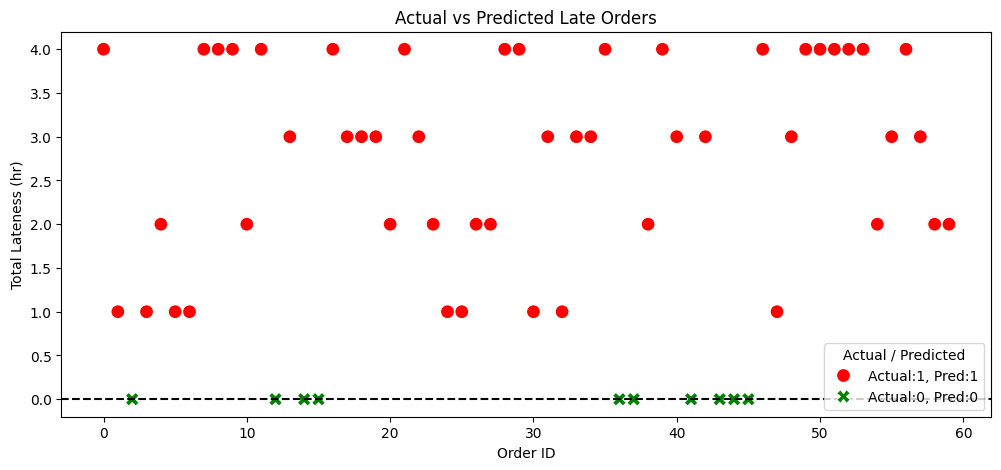

/var/folders/3f/j9w_ny_x2f36_w_zt7rzg1400000gn/T/ipykernel_4060/150060061.py:93: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Status', data=order_summary, palette=palette)


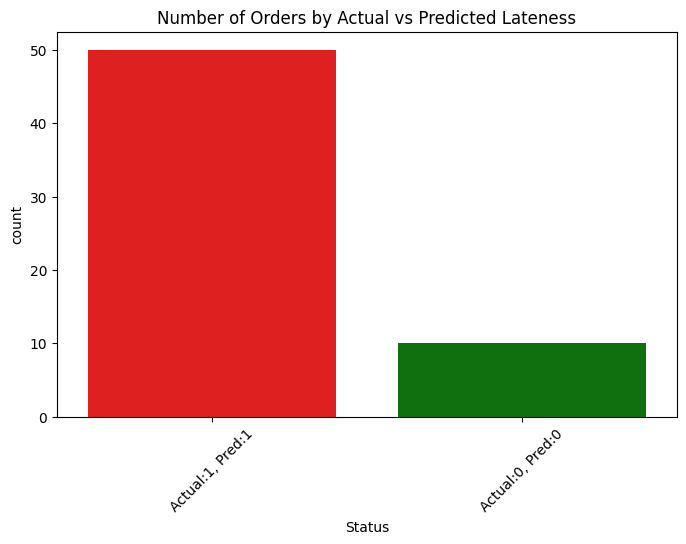


--- Machine Summary (Bottlenecks) ---


,Machine,OptimizedLateness,PredictedLate,NumOperations,PercentPredictedLate
0,M1,40,12,13,92.307692
1,M2,28,9,12,75.000000
2,M3,25,11,14,78.571429
3,M4,24,9,9,100.000000
4,M5,23,9,12,75.000000


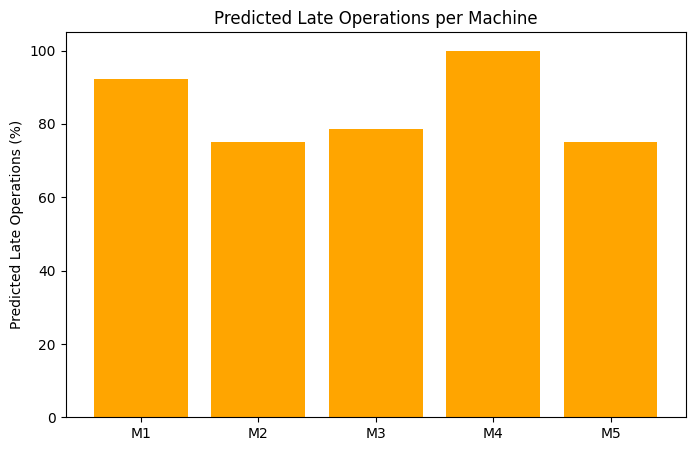

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from pulp import LpProblem, LpMinimize, LpVariable, lpSum


np.random.seed(42)
num_orders = 60
num_machines = 5

# Orders DataFrame
jobshop_df = pd.DataFrame({
    'OrderID': np.arange(num_orders),
    'Product': np.random.choice(['ProdA','ProdB','ProdC'], num_orders),
    'Quantity': np.random.randint(1,10,num_orders),
    'OrderDate': pd.Timestamp('2025-08-20') + pd.to_timedelta(np.random.randint(0,5,num_orders), unit='d'),
    'DeliveryTime_days': np.random.randint(1,5,num_orders),
    'PriorityNum': np.random.randint(1,4,num_orders)
})

# Machines & process info
jobshop_df['Machine'] = np.random.choice([f'M{i}' for i in range(1,num_machines+1)], num_orders)
jobshop_df['ProcessTime_hr'] = np.random.randint(1,8,num_orders)
jobshop_df['NumOps'] = np.random.randint(1,5,num_orders)
jobshop_df['MachineLoad'] = np.random.rand(num_orders) * 100
jobshop_df['DaysUntilDue'] = jobshop_df['DeliveryTime_days'] + np.random.randint(-1,2,num_orders)
jobshop_df['OptimizedLateness'] = np.random.randint(0,5,num_orders)
jobshop_df['LateFlag'] = (jobshop_df['OptimizedLateness'] > 0).astype(int)


print("\n--- Jobshop DataFrame Head ---")
display(jobshop_df.head())

print("\n--- Missing Values ---")
display(jobshop_df.isnull().sum())

print("\n--- Descriptive Stats ---")
display(jobshop_df.describe())


features = ['PriorityNum','ProcessTime_hr','NumOps','MachineLoad','DaysUntilDue']
X = jobshop_df[features]
y = jobshop_df['LateFlag']

clf = RandomForestClassifier(n_estimators=50, random_state=42)
clf.fit(X, y)
y_pred = clf.predict(X)
jobshop_df['PredictedLate'] = y_pred

print("\n--- Classification Report ---")
print(classification_report(y, y_pred))

importances = pd.Series(clf.feature_importances_, index=features)
print("\n--- Feature Importances ---")
display(importances)


order_summary = jobshop_df.groupby('OrderID').agg({
    'OptimizedLateness':'sum',
    'PredictedLate':'max'
}).reset_index()
order_summary['ActualLateFlag'] = (order_summary['OptimizedLateness'] > 0).astype(int)
order_summary['Status'] = order_summary.apply(
    lambda row: f"Actual:{row['ActualLateFlag']}, Pred:{row['PredictedLate']}", axis=1
)

palette = {
    "Actual:0, Pred:0": "green",
    "Actual:0, Pred:1": "orange",
    "Actual:1, Pred:0": "blue",
    "Actual:1, Pred:1": "red"
}

plt.figure(figsize=(12,5))
sns.scatterplot(data=order_summary, x='OrderID', y='OptimizedLateness',
                hue='Status', style='Status', palette=palette, s=100)
plt.axhline(0, color='black', linestyle='--')
plt.title('Actual vs Predicted Late Orders')
plt.xlabel('Order ID')
plt.ylabel('Total Lateness (hr)')
plt.legend(title='Actual / Predicted')
plt.show()

plt.figure(figsize=(8,5))
sns.countplot(x='Status', data=order_summary, palette=palette)
plt.title('Number of Orders by Actual vs Predicted Lateness')
plt.xticks(rotation=45)
plt.show()


machine_summary = jobshop_df.groupby('Machine').agg({
    'OptimizedLateness':'sum',
    'PredictedLate':'sum',
    'OrderID':'count'
}).rename(columns={'OrderID':'NumOperations'}).reset_index()
machine_summary['PercentPredictedLate'] = 100 * machine_summary['PredictedLate'] / machine_summary['NumOperations']
machine_summary = machine_summary.sort_values('OptimizedLateness', ascending=False)

print("\n--- Machine Summary (Bottlenecks) ---")
display(machine_summary)

plt.figure(figsize=(8,5))
plt.bar(machine_summary['Machine'], machine_summary['PercentPredictedLate'], color='orange')
plt.ylabel('Predicted Late Operations (%)')
plt.title('Predicted Late Operations per Machine')
plt.show()


Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/fatlumdili/ai_finance_project/ai_project_env/lib/python3.10/site-packages/pulp/apis/../solverdir/cbc/osx/i64/cbc /var/folders/3f/j9w_ny_x2f36_w_zt7rzg1400000gn/T/c7d3d11530c9446c8a4ad650fea40471-pulp.mps -timeMode elapsed -branch -printingOptions all -solution /var/folders/3f/j9w_ny_x2f36_w_zt7rzg1400000gn/T/c7d3d11530c9446c8a4ad650fea40471-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 799 COLUMNS
At line 3796 RHS
At line 4591 BOUNDS
At line 4929 ENDATA
Problem MODEL has 794 rows, 517 columns and 2262 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 25 - 0.00 seconds
Cgl0004I processed model has 734 rows, 457 columns (337 integer (337 of which binary)) and 2142 elements
Cbc0038I Initial state - 337 integers unsatisfied sum - 0.1468
Cbc0038I Pass   1: suminf.    0.00000 (0) obj. 330 

,OrderID,Machine,ProcessTime_hr,DaysUntilDue,OptimizedStart_hr,OptimizedFinish_hr,OptimizedLateness
0,0,M4,5,0,0.0,5.0,5.0
1,1,M3,4,2,39.0,43.0,0.0
2,2,M3,2,0,1.0,3.0,3.0
3,3,M5,7,5,53.0,60.0,0.0
4,4,M3,1,0,0.0,1.0,1.0
5,5,M3,4,4,35.0,39.0,0.0
6,6,M3,5,0,3.0,8.0,8.0
7,7,M2,4,2,36.0,40.0,0.0
8,8,M5,1,1,23.0,24.0,0.0
9,9,M1,6,3,50.0,56.0,0.0


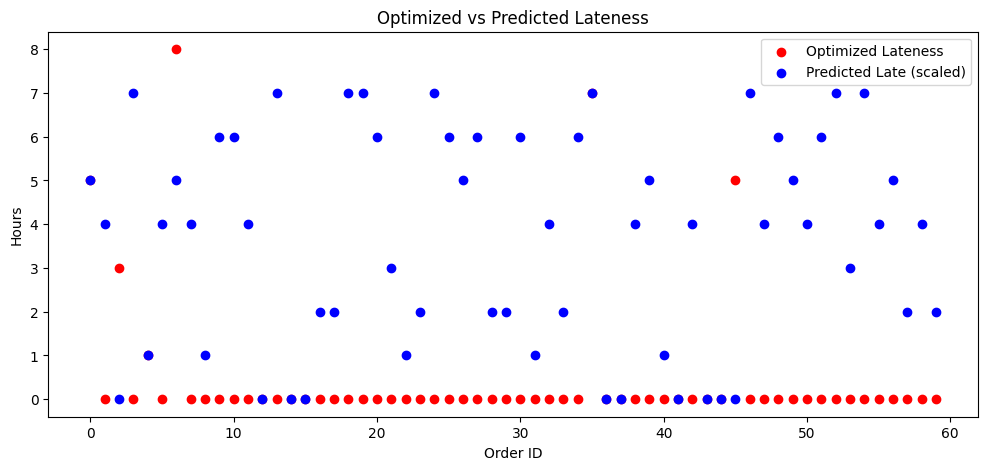

In [17]:
from pulp import LpProblem, LpMinimize, LpVariable, lpSum, LpStatus


prob = LpProblem("Jobshop_Scheduling", LpMinimize)

# Decision variables: Start time for each order
start_vars = {row.OrderID: LpVariable(f"Start_{row.OrderID}", lowBound=0) for idx, row in jobshop_df.iterrows()}

# Finish time
finish_vars = {row.OrderID: LpVariable(f"Finish_{row.OrderID}", lowBound=0) for idx, row in jobshop_df.iterrows()}

# Lateness variable
lateness_vars = {row.OrderID: LpVariable(f"Lateness_{row.OrderID}", lowBound=0) for idx, row in jobshop_df.iterrows()}



for idx, row in jobshop_df.iterrows():
    order_id = row.OrderID
    # Finish = Start + ProcessTime
    prob += finish_vars[order_id] == start_vars[order_id] + row.ProcessTime_hr
    
    # Lateness = max(0, Finish - DueDate)
    due_time = row.DaysUntilDue * 24  # convert days to hours
    prob += lateness_vars[order_id] >= finish_vars[order_id] - due_time

# Machine constraints: no overlap for orders on the same machine
machines = jobshop_df['Machine'].unique()
for m in machines:
    machine_orders = jobshop_df[jobshop_df['Machine'] == m]['OrderID'].values
    for i in range(len(machine_orders)):
        for j in range(i+1, len(machine_orders)):
            o1, o2 = machine_orders[i], machine_orders[j]
            # Either o1 before o2 or o2 before o1 (big-M approach)
            M = 1e4  # large number
            y = LpVariable(f"y_{o1}_{o2}", cat='Binary')
            prob += start_vars[o1] + jobshop_df.loc[jobshop_df.OrderID==o1, 'ProcessTime_hr'].values[0] <= start_vars[o2] + M*(1 - y)
            prob += start_vars[o2] + jobshop_df.loc[jobshop_df.OrderID==o2, 'ProcessTime_hr'].values[0] <= start_vars[o1] + M*y

prob += lpSum([lateness_vars[oid] for oid in jobshop_df['OrderID']])

prob.solve()

print("\nLP Status:", LpStatus[prob.status])

jobshop_df['OptimizedStart_hr'] = [start_vars[oid].varValue for oid in jobshop_df['OrderID']]
jobshop_df['OptimizedFinish_hr'] = [finish_vars[oid].varValue for oid in jobshop_df['OrderID']]
jobshop_df['OptimizedLateness'] = [lateness_vars[oid].varValue for oid in jobshop_df['OrderID']]

display(jobshop_df[['OrderID','Machine','ProcessTime_hr','DaysUntilDue','OptimizedStart_hr','OptimizedFinish_hr','OptimizedLateness']])

# Optional: plot optimized lateness vs predicted lateness
plt.figure(figsize=(12,5))
plt.scatter(jobshop_df['OrderID'], jobshop_df['OptimizedLateness'], color='red', label='Optimized Lateness')
plt.scatter(jobshop_df['OrderID'], jobshop_df['PredictedLate']*jobshop_df['ProcessTime_hr'], color='blue', label='Predicted Late (scaled)')
plt.xlabel('Order ID')
plt.ylabel('Hours')
plt.title('Optimized vs Predicted Lateness')
plt.legend()
plt.show()


Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/fatlumdili/ai_finance_project/ai_project_env/lib/python3.10/site-packages/pulp/apis/../solverdir/cbc/osx/i64/cbc /var/folders/3f/j9w_ny_x2f36_w_zt7rzg1400000gn/T/0ad43f7972134e7392b1faac6d5a83ba-pulp.mps -timeMode elapsed -branch -printingOptions all -solution /var/folders/3f/j9w_ny_x2f36_w_zt7rzg1400000gn/T/0ad43f7972134e7392b1faac6d5a83ba-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 799 COLUMNS
At line 3796 RHS
At line 4591 BOUNDS
At line 4929 ENDATA
Problem MODEL has 794 rows, 517 columns and 2262 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 43 - 0.00 seconds
Cgl0004I processed model has 734 rows, 457 columns (337 integer (337 of which binary)) and 2142 elements
Cbc0038I Initial state - 336 integers unsatisfied sum - 0.1456
Cbc0038I Pass   1: suminf.    0.00000 (0) obj. 545 

,OrderID,Machine,ProcessTime_hr,DaysUntilDue,PredictedLate,OptimizedStart_hr,OptimizedFinish_hr,OptimizedLateness
0,0,M4,5,0,1,0.0,5.0,5.0
1,1,M3,4,2,1,39.0,43.0,0.0
2,2,M3,2,0,0,1.0,3.0,3.0
3,3,M5,7,5,1,24.0,31.0,0.0
4,4,M3,1,0,1,0.0,1.0,1.0
5,5,M3,4,4,1,16.0,20.0,0.0
6,6,M3,5,0,1,3.0,8.0,8.0
7,7,M2,4,2,1,39.0,43.0,0.0
8,8,M5,1,1,1,7.0,8.0,0.0
9,9,M1,6,3,1,28.0,34.0,0.0


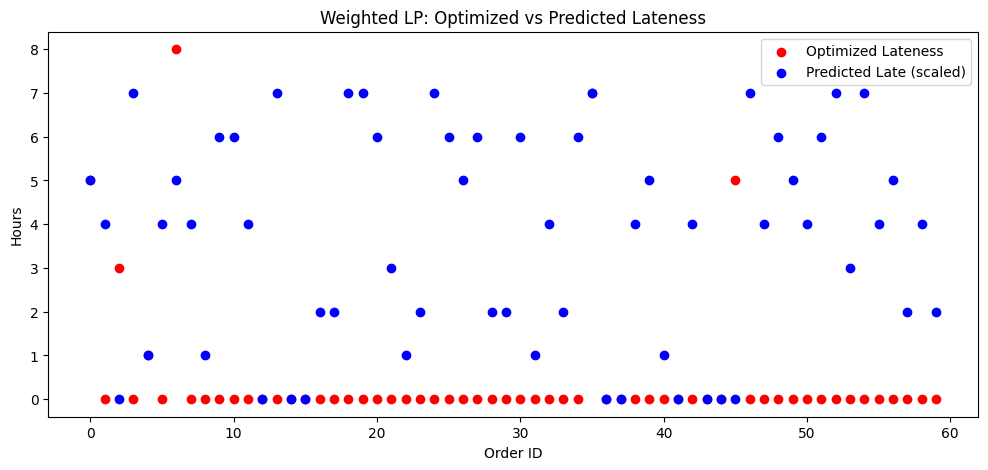

In [19]:
from pulp import LpProblem, LpMinimize, LpVariable, lpSum, LpStatus, PULP_CBC_CMD

# Optional: smaller demo subset for faster run
demo_df = jobshop_df.copy()  # use full dataset; change to .sample(20) for quick test

prob = LpProblem("Jobshop_Scheduling_Weighted", LpMinimize)

# Decision variables
start_vars = {row.OrderID: LpVariable(f"Start_{row.OrderID}", lowBound=0) for idx, row in demo_df.iterrows()}
finish_vars = {row.OrderID: LpVariable(f"Finish_{row.OrderID}", lowBound=0) for idx, row in demo_df.iterrows()}
lateness_vars = {row.OrderID: LpVariable(f"Lateness_{row.OrderID}", lowBound=0) for idx, row in demo_df.iterrows()}

for idx, row in demo_df.iterrows():
    oid = row.OrderID
    # Finish = Start + ProcessTime
    prob += finish_vars[oid] == start_vars[oid] + row.ProcessTime_hr
    # Lateness >= Finish - DueTime
    due_hr = row.DaysUntilDue * 24
    prob += lateness_vars[oid] >= finish_vars[oid] - due_hr

# Machine constraints: no overlap on same machine
machines = demo_df['Machine'].unique()
for m in machines:
    machine_orders = demo_df[demo_df['Machine']==m]['OrderID'].values
    for i in range(len(machine_orders)):
        for j in range(i+1, len(machine_orders)):
            o1, o2 = machine_orders[i], machine_orders[j]
            M = 1e4
            y = LpVariable(f"y_{o1}_{o2}", cat='Binary')
            prob += start_vars[o1] + demo_df.loc[demo_df.OrderID==o1,'ProcessTime_hr'].values[0] <= start_vars[o2] + M*(1-y)
            prob += start_vars[o2] + demo_df.loc[demo_df.OrderID==o2,'ProcessTime_hr'].values[0] <= start_vars[o1] + M*y

weight_factor = 2
weights = demo_df['PredictedLate'].apply(lambda x: weight_factor if x==1 else 1)
prob += lpSum([lateness_vars[oid]*weights[oid] for oid in demo_df['OrderID']])

prob.solve(PULP_CBC_CMD(msg=1))  # show solver progress
print("\nLP Status:", LpStatus[prob.status])

demo_df['OptimizedStart_hr'] = [start_vars[oid].varValue for oid in demo_df['OrderID']]
demo_df['OptimizedFinish_hr'] = [finish_vars[oid].varValue for oid in demo_df['OrderID']]
demo_df['OptimizedLateness'] = [lateness_vars[oid].varValue for oid in demo_df['OrderID']]

display(demo_df[['OrderID','Machine','ProcessTime_hr','DaysUntilDue','PredictedLate','OptimizedStart_hr','OptimizedFinish_hr','OptimizedLateness']])

plt.figure(figsize=(12,5))
plt.scatter(demo_df['OrderID'], demo_df['OptimizedLateness'], color='red', label='Optimized Lateness')
plt.scatter(demo_df['OrderID'], demo_df['PredictedLate']*demo_df['ProcessTime_hr'], color='blue', label='Predicted Late (scaled)')
plt.xlabel('Order ID')
plt.ylabel('Hours')
plt.title('Weighted LP: Optimized vs Predicted Lateness')
plt.legend()
plt.show()


Total predicted lateness (hours): 218
Total optimized lateness (hours): 29.0
Number of late orders predicted: 50
Number of late orders after optimization: 6


,Machine,OptimizedLateness
0,M1,0.000000
1,M2,0.416667
2,M3,0.857143
3,M4,0.555556
4,M5,0.583333


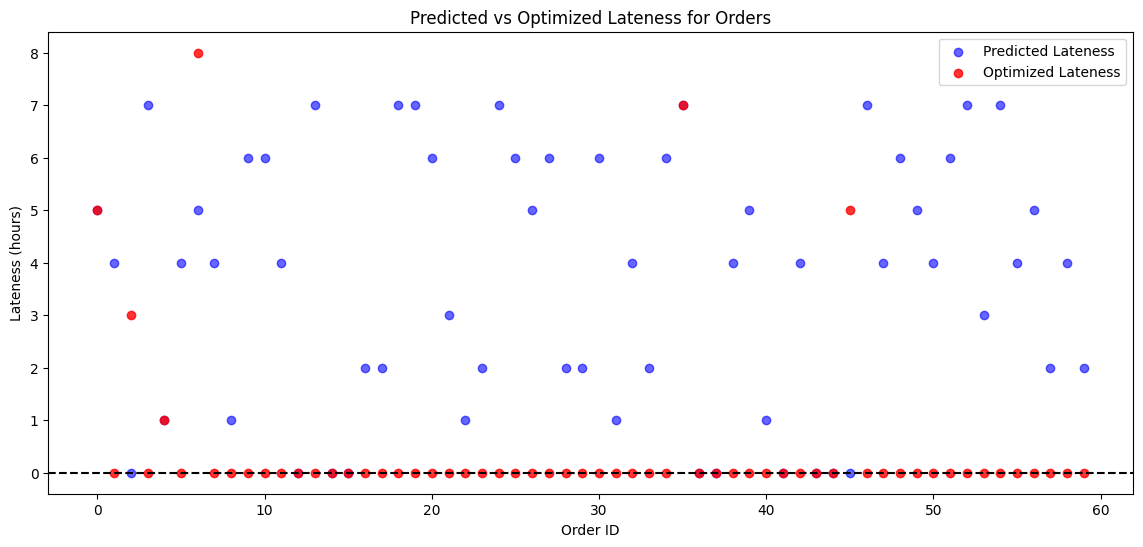

Orders that improved after optimization:


,OrderID,Machine,ProcessTime_hr,DaysUntilDue,PredictedLateness,OptimizedLateness
1,1,M3,4,2,4,0.0
3,3,M5,7,5,7,0.0
5,5,M3,4,4,4,0.0
7,7,M2,4,2,4,0.0
8,8,M5,1,1,1,0.0
9,9,M1,6,3,6,0.0
10,10,M4,6,2,6,0.0
11,11,M1,4,2,4,0.0
13,13,M4,7,3,7,0.0
16,16,M4,2,2,2,0.0


/var/folders/3f/j9w_ny_x2f36_w_zt7rzg1400000gn/T/ipykernel_4060/3561682052.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Machine', y='OptimizedLateness', data=avg_lateness_machine, palette='magma')


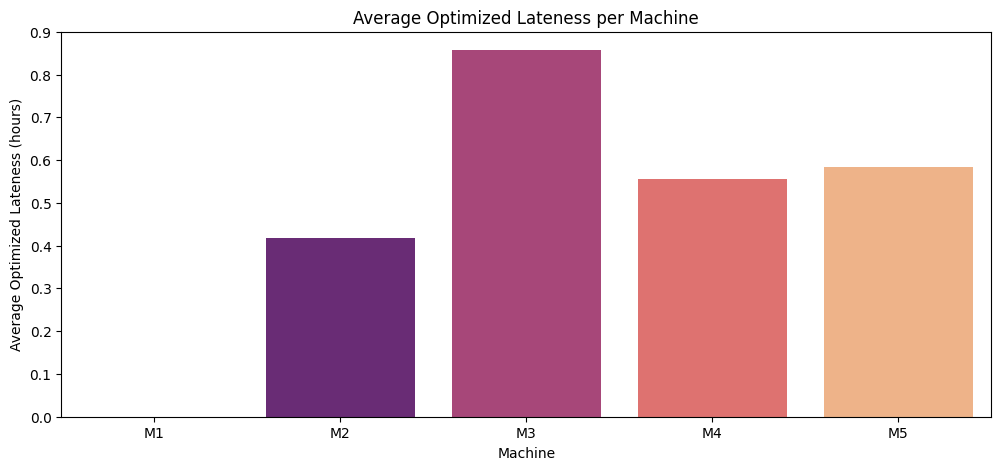

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1️⃣ Add original predicted lateness scaled to process time for comparison ---
demo_df['PredictedLateness'] = demo_df['PredictedLate'] * demo_df['ProcessTime_hr']

total_predicted_late = demo_df['PredictedLateness'].sum()
total_optimized_late = demo_df['OptimizedLateness'].sum()
late_orders_before = (demo_df['PredictedLate']==1).sum()
late_orders_after = (demo_df['OptimizedLateness']>0).sum()

print("Total predicted lateness (hours):", total_predicted_late)
print("Total optimized lateness (hours):", total_optimized_late)
print("Number of late orders predicted:", late_orders_before)
print("Number of late orders after optimization:", late_orders_after)

# Average lateness per machine
avg_lateness_machine = demo_df.groupby('Machine')['OptimizedLateness'].mean().reset_index()
display(avg_lateness_machine)

plt.figure(figsize=(14,6))
plt.scatter(demo_df['OrderID'], demo_df['PredictedLateness'], color='blue', alpha=0.6, label='Predicted Lateness')
plt.scatter(demo_df['OrderID'], demo_df['OptimizedLateness'], color='red', alpha=0.8, label='Optimized Lateness')
plt.xlabel('Order ID')
plt.ylabel('Lateness (hours)')
plt.title('Predicted vs Optimized Lateness for Orders')
plt.axhline(0, color='black', linestyle='--')
plt.legend()
plt.show()

demo_df['Improved'] = demo_df['OptimizedLateness'] < demo_df['PredictedLateness']
improved_orders = demo_df[demo_df['Improved']]
print("Orders that improved after optimization:")
display(improved_orders[['OrderID','Machine','ProcessTime_hr','DaysUntilDue','PredictedLateness','OptimizedLateness']])

plt.figure(figsize=(12,5))
sns.barplot(x='Machine', y='OptimizedLateness', data=avg_lateness_machine, palette='magma')
plt.ylabel('Average Optimized Lateness (hours)')
plt.title('Average Optimized Lateness per Machine')
plt.show()


Scenario 1: Random process time increase (10-30%)
Total simulated lateness (hours): 38.73420494049083
Number of late orders in scenario: 10


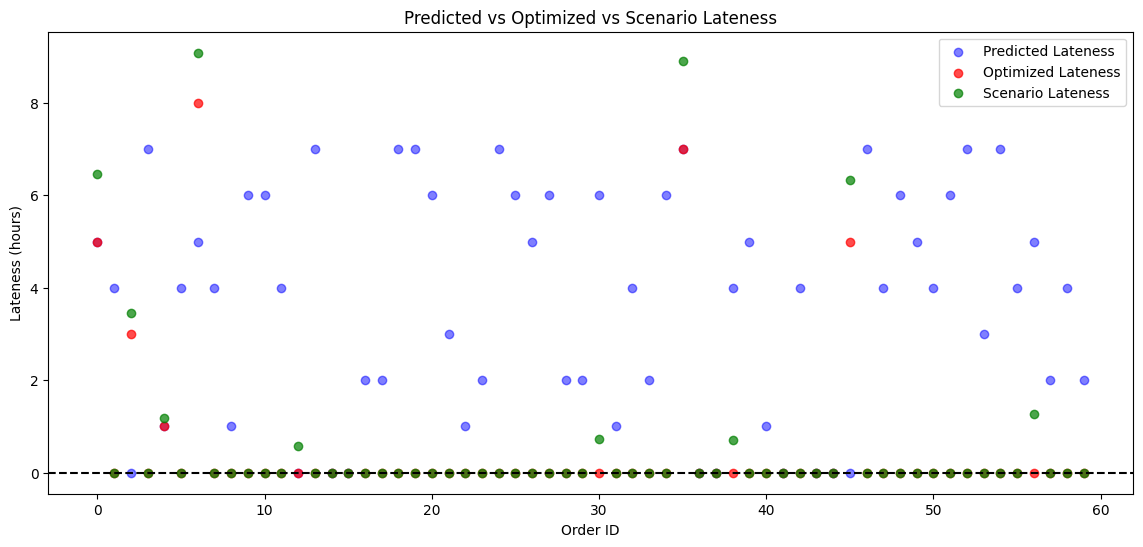

Orders most affected by scenario changes:


,OrderID,Machine,ProcessTime_hr,ProcessTime_hr_Sim,OptimizedLateness,SimulatedLateness
0,0,M4,5,6.469303,5.0,6.469303
2,2,M3,2,2.451759,3.0,3.451759
4,4,M3,1,1.190908,1.0,1.190908
6,6,M3,5,6.084314,8.0,9.084314
12,12,M5,3,3.573394,0.0,0.573394
30,30,M5,6,7.739760,0.0,0.739760
35,35,M5,7,8.912489,7.0,8.912489
38,38,M3,4,4.701171,0.0,0.701171
45,45,M2,5,6.342119,5.0,6.342119
56,56,M2,5,6.268987,0.0,1.268987


In [21]:
import numpy as np

scenario_df = demo_df.copy()
scenario_df['ProcessTime_hr_Sim'] = scenario_df['ProcessTime_hr'] * np.random.uniform(1.1, 1.3, size=len(scenario_df))

scenario_df['SimulatedFinish_hr'] = scenario_df['OptimizedStart_hr'] + scenario_df['ProcessTime_hr_Sim']
scenario_df['SimulatedLateness'] = np.maximum(scenario_df['SimulatedFinish_hr'] - scenario_df['DaysUntilDue']*24, 0)

total_simulated_late = scenario_df['SimulatedLateness'].sum()
late_orders_sim = (scenario_df['SimulatedLateness']>0).sum()

print("Scenario 1: Random process time increase (10-30%)")
print("Total simulated lateness (hours):", total_simulated_late)
print("Number of late orders in scenario:", late_orders_sim)

plt.figure(figsize=(14,6))
plt.scatter(demo_df['OrderID'], demo_df['PredictedLateness'], color='blue', alpha=0.5, label='Predicted Lateness')
plt.scatter(demo_df['OrderID'], demo_df['OptimizedLateness'], color='red', alpha=0.7, label='Optimized Lateness')
plt.scatter(scenario_df['OrderID'], scenario_df['SimulatedLateness'], color='green', alpha=0.7, label='Scenario Lateness')
plt.axhline(0, color='black', linestyle='--')
plt.xlabel('Order ID')
plt.ylabel('Lateness (hours)')
plt.title('Predicted vs Optimized vs Scenario Lateness')
plt.legend()
plt.show()

scenario_df['Worsened'] = scenario_df['SimulatedLateness'] > scenario_df['OptimizedLateness']
vulnerable_orders = scenario_df[scenario_df['Worsened']]
print("Orders most affected by scenario changes:")
display(vulnerable_orders[['OrderID','Machine','ProcessTime_hr','ProcessTime_hr_Sim','OptimizedLateness','SimulatedLateness']])


In [22]:
import pandas as pd
import numpy as np

new_orders = pd.DataFrame({
    'OrderID': range(demo_df['OrderID'].max()+1, demo_df['OrderID'].max()+6),
    'Machine': np.random.choice(demo_df['Machine'].unique(), size=5),
    'ProcessTime_hr': np.random.randint(2,8,size=5),
    'DaysUntilDue': np.random.randint(1,5,size=5),
    'PredictedLate': np.random.choice([0,1], size=5)
})

iterative_df = pd.concat([demo_df, new_orders], ignore_index=True)

from pulp import LpProblem, LpMinimize, LpVariable, lpSum, LpStatus, PULP_CBC_CMD

prob = LpProblem("Jobshop_Scheduling_Iterative", LpMinimize)

# Decision variables
start_vars = {row.OrderID: LpVariable(f"Start_{row.OrderID}", lowBound=0) for idx,row in iterative_df.iterrows()}
finish_vars = {row.OrderID: LpVariable(f"Finish_{row.OrderID}", lowBound=0) for idx,row in iterative_df.iterrows()}
lateness_vars = {row.OrderID: LpVariable(f"Lateness_{row.OrderID}", lowBound=0) for idx,row in iterative_df.iterrows()}

# Constraints
for idx, row in iterative_df.iterrows():
    oid = row.OrderID
    prob += finish_vars[oid] == start_vars[oid] + row.ProcessTime_hr
    due_hr = row.DaysUntilDue * 24
    prob += lateness_vars[oid] >= finish_vars[oid] - due_hr

# Machine constraints
machines = iterative_df['Machine'].unique()
for m in machines:
    machine_orders = iterative_df[iterative_df['Machine']==m]['OrderID'].values
    for i in range(len(machine_orders)):
        for j in range(i+1, len(machine_orders)):
            o1, o2 = machine_orders[i], machine_orders[j]
            M = 1e4
            y = LpVariable(f"y_{o1}_{o2}", cat='Binary')
            prob += start_vars[o1] + iterative_df.loc[iterative_df.OrderID==o1,'ProcessTime_hr'].values[0] <= start_vars[o2] + M*(1-y)
            prob += start_vars[o2] + iterative_df.loc[iterative_df.OrderID==o2,'ProcessTime_hr'].values[0] <= start_vars[o1] + M*y

# Weighted objective
weight_factor = 2
weights = iterative_df['PredictedLate'].apply(lambda x: weight_factor if x==1 else 1)
prob += lpSum([lateness_vars[oid]*weights[oid] for oid in iterative_df['OrderID']])

# Solve
prob.solve(PULP_CBC_CMD(msg=1))
print("\nLP Status:", LpStatus[prob.status])

# Extract results
iterative_df['OptimizedStart_hr'] = [start_vars[oid].varValue for oid in iterative_df['OrderID']]
iterative_df['OptimizedFinish_hr'] = [finish_vars[oid].varValue for oid in iterative_df['OrderID']]
iterative_df['OptimizedLateness'] = [lateness_vars[oid].varValue for oid in iterative_df['OrderID']]

# Display updated schedule
display(iterative_df[['OrderID','Machine','ProcessTime_hr','DaysUntilDue','PredictedLate','OptimizedStart_hr','OptimizedFinish_hr','OptimizedLateness']])


Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/fatlumdili/ai_finance_project/ai_project_env/lib/python3.10/site-packages/pulp/apis/../solverdir/cbc/osx/i64/cbc /var/folders/3f/j9w_ny_x2f36_w_zt7rzg1400000gn/T/df7d8270a61a4e3bb9f625a785512130-pulp.mps -timeMode elapsed -branch -printingOptions all -solution /var/folders/3f/j9w_ny_x2f36_w_zt7rzg1400000gn/T/df7d8270a61a4e3bb9f625a785512130-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 925 COLUMNS
At line 4411 RHS
At line 5332 BOUNDS
At line 5728 ENDATA
Problem MODEL has 920 rows, 590 columns and 2630 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 43 - 0.00 seconds
Cgl0004I processed model has 855 rows, 525 columns (395 integer (395 of which binary)) and 2500 elements
Cbc0038I Initial state - 392 integers unsatisfied sum - 0.1648
Cbc0038I Pass   1: suminf.    0.00000 (0) obj. 621 

KeyboardInterrupt: 

In [23]:
import pandas as pd
import numpy as np
from pulp import LpProblem, LpMinimize, LpVariable, lpSum, LpStatus, PULP_CBC_CMD

# Parameters
batch_size = 5  


In [24]:
def optimize_batch(df_batch, prev_finish=None):
    """
    Optimize a small batch of orders.
    df_batch: DataFrame with 'OrderID','Machine','ProcessTime_hr','DaysUntilDue','PredictedLate'
    prev_finish: dict of previous machine finish times {machine: hr} for sequencing
    Returns: DataFrame with optimized start, finish, lateness
    """
    prob = LpProblem("Batch_Optimization", LpMinimize)

    start_vars = {oid: LpVariable(f"Start_{oid}", lowBound=0) for oid in df_batch['OrderID']}
    finish_vars = {oid: LpVariable(f"Finish_{oid}", lowBound=0) for oid in df_batch['OrderID']}
    lateness_vars = {oid: LpVariable(f"Lateness_{oid}", lowBound=0) for oid in df_batch['OrderID']}

    # Constraints
    for idx,row in df_batch.iterrows():
        oid = row.OrderID
        prob += finish_vars[oid] == start_vars[oid] + row.ProcessTime_hr
        due_hr = row.DaysUntilDue * 24
        prob += lateness_vars[oid] >= finish_vars[oid] - due_hr

        # Machine sequencing based on previous batch
        if prev_finish and row.Machine in prev_finish:
            prob += start_vars[oid] >= prev_finish[row.Machine]

    # Weighted objective
    weights = {row.OrderID: 2 if row.PredictedLate==1 else 1 for idx,row in df_batch.iterrows()}
    prob += lpSum([lateness_vars[oid]*weights[oid] for oid in df_batch['OrderID']])

    # Solve
    prob.solve(PULP_CBC_CMD(msg=0))

    # Update finish times for sequencing
    new_prev_finish = prev_finish.copy() if prev_finish else {}
    for m in df_batch['Machine'].unique():
        last_oid = df_batch[df_batch['Machine']==m]['OrderID'].iloc[-1]
        new_prev_finish[m] = finish_vars[last_oid].varValue

    # Add results to DataFrame
    df_batch['OptimizedStart_hr'] = [start_vars[oid].varValue for oid in df_batch['OrderID']]
    df_batch['OptimizedFinish_hr'] = [finish_vars[oid].varValue for oid in df_batch['OrderID']]
    df_batch['OptimizedLateness'] = [lateness_vars[oid].varValue for oid in df_batch['OrderID']]

    return df_batch, new_prev_finish


In [25]:
# Initialize
optimized_dfs = []
prev_finish_times = {}

# Split full dataset into batches
num_orders = len(jobshop_df)
for i in range(0, num_orders, batch_size):
    batch = jobshop_df.iloc[i:i+batch_size].copy()
    optimized_batch, prev_finish_times = optimize_batch(batch, prev_finish_times)
    optimized_dfs.append(optimized_batch)

# Combine all batches
jobshop_optimized = pd.concat(optimized_dfs).reset_index(drop=True)
display(jobshop_optimized)


,OrderID,Product,Quantity,OrderDate,DeliveryTime_days,PriorityNum,Machine,ProcessTime_hr,NumOps,MachineLoad,DaysUntilDue,OptimizedLateness,LateFlag,PredictedLate,OptimizedStart_hr,OptimizedFinish_hr
0,0,ProdC,1,2025-08-22,1,3,M4,5,2,70.365786,0,5.0,1,1,0.0,5.0
1,1,ProdA,4,2025-08-20,1,3,M3,4,3,47.417383,2,0.0,1,1,0.0,4.0
2,2,ProdC,2,2025-08-21,1,1,M3,2,1,9.783416,0,2.0,0,0,0.0,2.0
3,3,ProdC,8,2025-08-21,4,1,M5,7,4,49.161588,5,0.0,1,1,0.0,7.0
4,4,ProdA,4,2025-08-23,1,3,M3,1,3,47.347177,0,1.0,1,1,0.0,1.0
5,5,ProdA,2,2025-08-24,3,2,M3,4,3,17.320187,4,0.0,1,1,1.0,5.0
6,6,ProdC,6,2025-08-22,1,1,M3,5,4,43.385165,0,6.0,1,1,1.0,6.0
7,7,ProdB,6,2025-08-20,2,3,M2,4,2,39.850473,2,0.0,1,1,0.0,4.0
8,8,ProdC,4,2025-08-23,2,1,M5,1,3,61.585010,1,0.0,1,1,7.0,8.0
9,9,ProdC,6,2025-08-24,4,1,M1,6,2,63.509365,3,0.0,1,1,0.0,6.0


In [26]:
jobshop_optimized.head()
jobshop_optimized.to_csv("mock_data.csv", index=False)


In [27]:
!pip freeze > requirements.txt
